# RaDec_Neighbours

### Получение всех объектов каталога в заданной области

Астрономические каталоги формируются в ходе небесных обзоров (таких как sdss.org, cosmos.esa.int/web/gaia/)

***Требования к программе:***

На вход принимаются верхнее и нижнее значение для прямого восхождения (Ra, аналог широт для небесной сферы) и восхождения (Dec, аналог долгот). Каждому значению соответствует линия на сфере, четыре линии ограничивают прямоугольную область. На выходе должен быть получен список всех объектов каталога, находящихся в этой области.

In [1]:
import astropy

from astropy.io import fits
from astropy.table import Table
from astropy.table import Column
from astropy import units as u
from astropy.coordinates import SkyCoord

import fitsio

from IPython.display import Image
from IPython.core.display import HTML

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import healpy as hp

In [107]:
Nside = 2048

our_NPIX = 12*Nside**2

our_NPIX

50331648

**Директория с фитсами исходного разбиения Gaia DR2:**

In [3]:
# !ls /data/Gaia/gdr2/gaia_source/fits

**Открываю случайный фитс-файл:**

In [63]:
random_file_path = '/data/Gaia/gdr2/gaia_source/fits/GaiaSource_1000172165251650944_1000424567594791808.fits'

*Fitsio benchmark*

In [64]:
%%time

fitsio_example = fitsio.FITS(random_file_path)

CPU times: user 0 ns, sys: 882 µs, total: 882 µs
Wall time: 896 µs


*Astropy benchmark*

In [65]:
%%time

fits_example = fits.open(random_file_path)

CPU times: user 2.65 ms, sys: 924 µs, total: 3.58 ms
Wall time: 2.55 ms


In [66]:
fitsio_example = fitsio.FITS(random_file_path)

In [67]:
fitsio_data = fitsio_example[1]['source_id', 'ra', 'dec'][:]

In [72]:
df_example = pd.DataFrame(fitsio_data)

df_example

,source_id,ra,dec
0,1000225938242805248,103.447529,56.022025
1,1000383512003001728,105.187856,56.267982
2,1000274106300491264,103.424758,56.450903
3,1000396156385741312,105.049751,56.508777
4,1000250024419296000,103.352525,56.395144
5,1000176013542934016,101.929791,55.973333
6,1000183881922152704,101.853926,56.129320
7,1000383408923789568,105.128850,56.285081
8,1000284139343326080,103.396330,56.714410
9,1000175081534243200,101.780437,55.945333


In [70]:
fits_example_table = Table.read(fits_example, format='fits')

In [71]:
fits_example_table

source_id,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_matched_observations,visibility_periods_used,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag,phot_proc_mode,radial_velocity,radial_velocity_error,rv_nb_transits,phot_variable_flag,flame_flags
int64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,float32,float32,float64,float64,int32,int32,int32,int32,int32,bool,int32,float64,float64,float32,int32,float64,float64,float32,int32,float64,float64,float32,int32,float64,float64,int32,bool,int32
1000225938242805248,2015.5,103.4475289523685,0.04109941963375859,56.02202543042615,0.04517452434341332,0.582790372285251,0.07032848478107116,6.040460982932505,0.08393597680977205,5.055291338490129,0.07313802174143623,184,0,181,3,0.40449554,183.0135,0.07469026106267268,0.3830316170113439,31,21,10,0,22,False,189,9268.427338702939,4.9845487064559775,15.77085,21,4965.92379092404,15.251972317464963,16.111387,21,6233.600689639327,12.573140640441405,15.275072,0,-100.0,-100.0,0,False,0
1000383512003001728,2015.5,105.1878559403631,0.016977551270711513,56.267982095887305,0.016903763860979578,1.3856861956483002,0.023642841120964403,22.89788131442622,0.03434978866829247,-9.885236976051676,0.03249639185970944,186,0,185,1,-1.7370577,148.42531,0.0,0.0,31,21,11,0,23,False,202,94231.47358445867,23.577564074504032,13.252875,20,50135.26220190826,71.5707474026405,13.60103,19,64273.134860082115,53.45034469253692,12.741846,0,-100.0,-100.0,0,False,0
1000274106300491264,2015.5,103.42475813355888,0.46460785796226267,56.4509029273674,0.5824898440349664,0.3140346813433826,0.8946739045107119,-4.521304219905333,0.7892547578692352,-5.547878990107712,0.6746814174483251,195,0,194,1,1.0383844,209.20168,0.7125994972288285,0.420175769325166,31,22,12,0,23,False,203,214.12084454426326,1.04554734852966,19.86172,21,57.23838701483902,6.706502845315356,20.95717,21,235.7701129601971,5.291044212080072,18.830698,0,-100.0,-100.0,0,False,-100
1000396156385741312,2015.5,105.04975070564205,0.8382322257255206,56.50877738319235,0.7445108292028818,1.9399507227605388,1.1595656410069761,-2.5663293781616328,1.4792082218971123,1.8341691451162787,1.2443579138331746,129,0,129,0,0.85160655,137.18605,0.0,0.0,31,15,8,0,16,False,137,117.64889399945164,1.1672003644883542,20.511896,13,43.54843330265115,7.839745310908397,21.253958,14,159.00930031467976,11.659480955869432,19.258364,0,-100.0,-100.0,0,False,-100
1000250024419296000,2015.5,103.35252488087359,0.023159487514148126,56.3951438077475,0.022835972469952497,0.7471075531667106,0.03640075236568113,5.426702338191655,0.04541129853537301,-3.4681093990756002,0.03740801268451435,188,0,186,2,-2.6570694,134.45885,0.0,0.0,31,22,12,0,23,False,194,34481.0655968688,9.868142609987723,14.344414,23,18920.659953008657,33.11330958332746,14.659047,23,22720.349266808014,19.122784076572653,13.870882,0,-100.0,-100.0,0,False,0
1000176013542934016,2015.5,101.9297907313791,0.01975790596340262,55.97333308306007,0.01943718307131281,0.6317176869646334,0.028703343245328382,4.8846354846604845,0.04082534628879752,-6.415440677835337,0.033051047161115635,235,0,234,1,-2.361722,181.51265,0.0,0.0,31,27,13,0,27,False,235,45075.43617243898,10.256319097771861,14.053515,23,23582.527592839717,24.814650096013267,14.419912,24,31102.6362269535,29.780717349760174,13.529927,1,-100.0,-100.0,0,False,-100
1000183881922152704,2015.5,101.85392575681381,0.7693765410917063,56.12931975610637,0.6911547075210795,0.5674150450950011,0.96601417918

***

**Тест Healpix:**

In [6]:
Image(url= "https://healpix.sourceforge.io/images/gorski_f1.jpg")

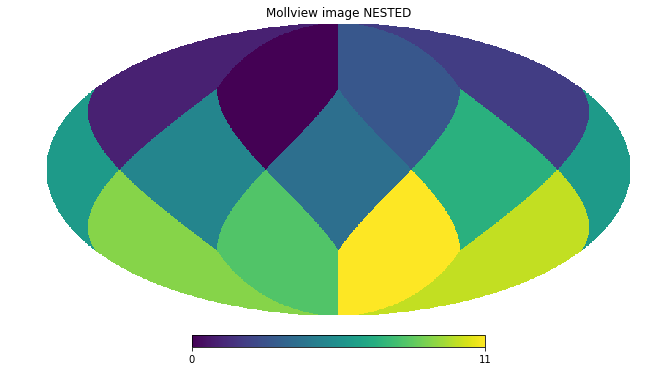

In [7]:
min_NPIX = 12    #задаю число пикселей (здесь минимальное)

alpha = np.arange(min_NPIX)
hp.mollview(alpha, nest=True, title="Mollview image NESTED")

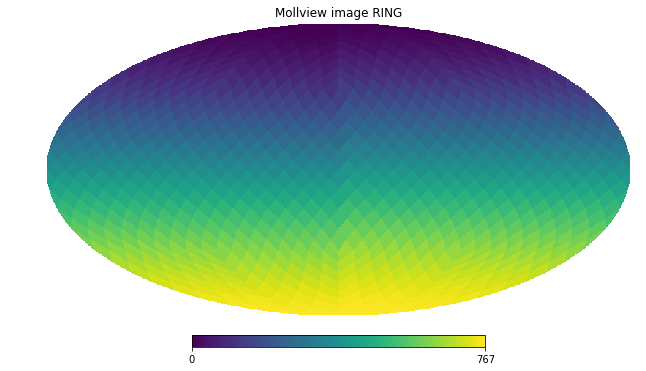

In [8]:
beta = hp.nside2npix(2**3)

hp.mollview(np.arange(beta), title="Mollview image RING")

Мы будем использовать разбиение на 50 331 648 пикселей, что соответствует Nside = 2048

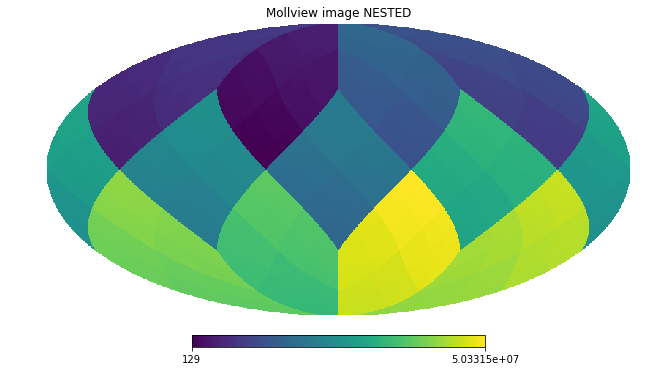

In [9]:
gamma = np.arange(hp.nside2npix(2048))
hp.mollview(gamma, nest=True, title="Mollview image NESTED")

**Открываю таблицу соответствия индексов хеалпикселей номерам оригинальных полей Gaia DR2, из фитса с многомерной колонкой делаю двумерный датафрейм:**

In [115]:
# index_fields_path = '/data/Gaia/gdr2/gaia_source/index/index_fields.fits'

# index_fields_fitsio = fitsio.FITS(index_fields_path)

# fitsio_hdu = index_fields_fitsio[1]

# fitsio_hdu

# fitsio_arr = fitsio_hdu['FIELDS'].read()

# fitsio_IndField_df = pd.DataFrame(fitsio_arr)

# NFIELDS_arr = fitsio_hdu['NFIELDS'].read()

# fitsio_IndField_df.insert(0, 'NFIELDS', pd.Series(NFIELDS_arr))

In [11]:
# Сохранение измененного датафрейма в .pkl формат

# fitsio_IndField_df.to_pickle('/home/mbelveder/RaDec_Neighbours_DATA/fitsio_IndField_df.pkl')

**Значения в колонках:** ***Индекс строки*** соответствует индексу хеалпикселя, ***NFIELDS*** -- количеству ненулевых значений в колонках 1 - 5, ***A, B, C, D, E*** содержат порядковые номера фитсов исходного разбиения (и соответствуют пяти измерениям колонки FIELDS исходного фитса index_fields)

In [12]:
index_fields_df = pd.read_pickle('/home/mbelveder/RaDec_Neighbours_DATA/fitsio_IndField_df.pkl')

index_fields_df.columns = ['NFIELDS', 'A', 'B', 'C', 'D', 'E']

index_fields_df

,NFIELDS,A,B,C,D,E
0,1,32368,0,0,0,0
1,0,0,0,0,0,0
2,1,32368,0,0,0,0
3,1,32368,0,0,0,0
4,1,32368,0,0,0,0
5,0,0,0,0,0,0
6,1,32368,0,0,0,0
7,1,32368,0,0,0,0
8,1,32368,0,0,0,0
9,1,32368,0,0,0,0


In [105]:
healpix_fields_numbers.sort_values(by=['NFIELDS'], ascending=False)

,NFIELDS,A,B,C,D,E
2901073,3,15872,17373,17377,0,0
2856831,3,17180,17184,17230,0,0
3182933,3,33430,33694,33707,0,0
2864469,3,17192,17218,17266,0,0
2624529,2,16192,16202,0,0,0
759056,2,40,140,0,0,0
18696111,2,10459,10461,0,0,0
2606589,2,16127,16138,0,0,0
20791842,2,11550,11556,0,0,0
3031343,2,29511,29528,0,0,0


**Открываю текстовый файл с порядковой нумерацией исходных фрагментов разбиения Gaia DR2, конвертирую в датафрейм, сохраняю в формате .pkl:**

In [14]:
!ls /data/Gaia/gdr2/gaia_source/aux/

fields_list


In [15]:
# fields_list_path = '/data/Gaia/gdr2/gaia_source/aux/fields_list'

# fields_list_raw_df = pd.read_csv(fields_list_path, sep="\s+", header=None, engine='python')

# fields_list_raw_df.columns = ["GAIA_DR2_FILENAME", "SERIAL_NUMBER"]

# fields_list_raw_df.to_pickle('/home/mbelveder/RaDec_Neighbours_DATA/fields_list_df.pkl')

In [16]:
fields_list_df = pd.read_pickle('/home/mbelveder/RaDec_Neighbours_DATA/fields_list_df.pkl')

In [17]:
fields_list_df

,GAIA_DR2_FILENAME,SERIAL_NUMBER
0,1000172165251650944_1000424567594791808,1
1,1000424601954531200_1000677322125743488,2
2,1000677386549270528_1000959999693425920,3
3,1000960034052654336_1001215258190537216,4
4,1001215288252921728_1001455428465395840,5
5,1001455467121397632_1001731032222989696,6
6,1001731062285590912_1001962891736267904,7
7,1001962921802480896_1002270686272717312,8
8,100222516391441280_100632114537641344,9
9,1002270754991788288_1002616826277079168,10


***

**Извлечение индексов хеалпикселей в заданной области**

In [89]:
# values in degrees
# 0 < RA < 360, increase from the right to the left
# -90 < DEC < 90

RA_right = 0.0
RA_left = 15

DEC_bottom = 0.0
DEC_top = 15

***Тест SkyCoord():***

In [90]:
# TOP_left = SkyCoord(ra=RA_left*u.degree, dec=DEC_top*u.degree, frame='icrs')
# TOP_right = SkyCoord(ra=RA_right*u.degree, dec=DEC_top*u.degree, frame='icrs')

# BOTTOM_left = SkyCoord(ra=RA_left*u.degree, dec=DEC_bottom*u.degree, frame='icrs')
# BOTTOM_right = SkyCoord(ra=RA_right*u.degree, dec=DEC_bottom*u.degree, frame='icrs')

In [91]:
# print(TOP_left.dec.degree, TOP_left.ra.degree)
# print(TOP_right.dec.degree, TOP_right.ra.degree)
# print(BOTTOM_left.dec.degree, BOTTOM_left.ra.degree)
# print(BOTTOM_right.dec.degree, BOTTOM_right.ra.degree)

**Перевод Ra Dec в декартовы:**

In [92]:
Ra_arr = np.array([RA_left, RA_right, RA_right, RA_left])

Dec_arr = np.array([DEC_top, DEC_top, DEC_bottom, DEC_bottom])

In [93]:
astropy_array = astropy.coordinates.spherical_to_cartesian(1, np.deg2rad(Dec_arr), np.deg2rad(Ra_arr))

vertex_array = np.array(astropy_array)

print(vertex_array.shape)
vertex_array

(3, 4)


array([[0.9330127 , 0.96592583, 1.        , 0.96592583],
       [0.25      , 0.        , 0.        , 0.25881905],
       [0.25881905, 0.25881905, 0.        , 0.        ]])

In [94]:
vertex_array.T

array([[0.9330127 , 0.25      , 0.25881905],
       [0.96592583, 0.        , 0.25881905],
       [1.        , 0.        , 0.        ],
       [0.96592583, 0.25881905, 0.        ]])

**Проверка:**

In [95]:
# def RaDec_to_cartesian(Ra, Dec):
    
#     Ra_rad = np.deg2rad(Ra)
#     Dec_rad = np.deg2rad(Dec)
    
#     vector_coordinates = astropy.coordinates.spherical_to_cartesian(1, Dec_rad, Ra_rad) #normalized to 1
#     array_float = np.array([vector_coordinates[0], vector_coordinates[1], vector_coordinates[2]])
    
#     return(array_float)

In [96]:
astropy.coordinates.spherical_to_cartesian(1, np.deg2rad(90), np.deg2rad(0))

(<Quantity 6.123234e-17>, <Quantity 0.>, <Quantity 1.>)

In [97]:
# RaDec_to_cartesian(0, 90)

In [98]:
astropy.coordinates.spherical_to_cartesian(1, np.deg2rad(DEC_top), np.deg2rad(RA_left))

(<Quantity 0.9330127>, <Quantity 0.25>, <Quantity 0.25881905>)

In [99]:
# RaDec_to_cartesian(RA_left, DEC_top)

***

**Получение индексов хеалпикселей в заданной области, визуализация. [Дополнительно](https://github.com/healpy/healpy/issues/549)**

In [100]:
vertex_array.T

array([[0.9330127 , 0.25      , 0.25881905],
       [0.96592583, 0.        , 0.25881905],
       [1.        , 0.        , 0.        ],
       [0.96592583, 0.25881905, 0.        ]])

In [101]:
heal_indexes = hp.query_polygon(Nside, vertex_array.T, nest=True, inclusive=True)

print(heal_indexes.shape)

heal_indexes

(274679,)


array([17825791, 18415615, 18452479, ..., 20317185, 20317186, 20318208])

In [108]:
Nside

2048

In [109]:
npix = hp.nside2npix(Nside)

m = np.arange(npix, dtype=float)
m[heal_indexes] = hp.UNSEEN

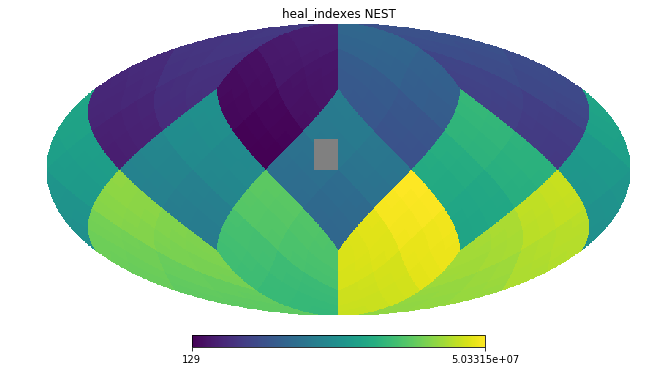

In [110]:
hp.mollview(m, nest=True, title="heal_indexes NEST")

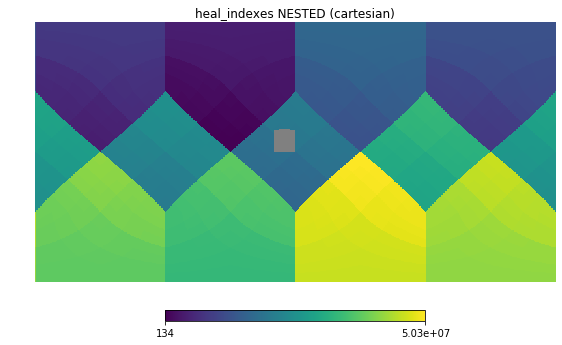

In [111]:
hp.visufunc.cartview(m, nest=True, title="heal_indexes NESTED (cartesian)")

***

## Ядро

**Доступ к порядковым номерам фитсов исходного разбиения по индексам выбранных хеалпикселей:**

In [116]:
healpix_fields_numbers = index_fields_df.iloc[heal_indexes] #Отсеиваю хеалпиксели вне выбранной зоны

healpix_fields_numbers

,NFIELDS,A,B,C,D,E
17825791,1,10075,0,0,0,0
18415615,1,10330,0,0,0,0
18452479,0,0,0,0,0,0
18454783,1,10346,0,0,0,0
18454927,0,0,0,0,0,0
18454936,1,10346,0,0,0,0
18454937,1,10346,0,0,0,0
18454938,0,0,0,0,0,0
18454939,0,0,0,0,0,0
18454942,1,10346,0,0,0,0


In [117]:
heal_indexes.shape

(274679,)

In [120]:
'{:.3e}'.format(our_NPIX - heal_indexes.shape[0]) #Столько хеалпикселей оказалось ВНЕ выбранной зоны

'5.006e+07'

In [121]:
'{:.3e}'.format(our_NPIX)

'5.033e+07'

**Привожу значения из колонок A -- E к одномерному массиву, оставляю только уникальные номера:**

In [143]:
HFN_df_values = healpix_fields_numbers[['A', 'B', 'C', 'D', 'E']].values

print(HFN_df_values.shape)

HFN_df_values

(274679, 5)


array([[10075,     0,     0,     0,     0],
       [10330,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0],
       ...,
       [11310,     0,     0,     0,     0],
       [11310,     0,     0,     0,     0],
       [11310,     0,     0,     0,     0]], dtype=int32)

In [153]:
HFN_df_unique = np.unique(HFN_df_values)

HFN_df_unique_nonzero = np.delete(HFN_df_unique, 0) #Избавляюсь от нуля

print(HFN_df_unique_nonzero.shape)

HFN_df_unique_nonzero

(129,)


array([10075, 10330, 10346, 10348, 10349, 10351, 10352, 10356, 10357,
       10367, 10368, 10369, 10371, 10372, 10373, 10376, 10377, 10379,
       10380, 10382, 10383, 10385, 10386, 10387, 10389, 10390, 10392,
       10393, 10395, 10396, 10398, 10399, 10401, 10402, 10404, 10405,
       10407, 10408, 10410, 10411, 10413, 10414, 10416, 10417, 10419,
       10420, 10484, 10486, 10494, 10495, 10497, 10498, 10500, 10501,
       10502, 10505, 10506, 10704, 11112, 11113, 11115, 11117, 11119,
       11120, 11122, 11123, 11124, 11126, 11127, 11129, 11134, 11135,
       11137, 11138, 11139, 11141, 11142, 11144, 11145, 11147, 11149,
       11150, 11152, 11154, 11156, 11157, 11159, 11161, 11163, 11164,
       11166, 11167, 11169, 11171, 11172, 11174, 11175, 11185, 11209,
       11211, 11212, 11214, 11215, 11217, 11219, 11220, 11222, 11223,
       11225, 11229, 11235, 11246, 11247, 11249, 11250, 11252, 11253,
       11255, 11256, 11258, 11259, 11261, 11262, 11264, 11265, 11267,
       11268, 11270,

In [152]:
274679 * 5 #Всего должно быть значений в одномерном массиве (вместе с нулями)

1373395

In [141]:
HFN_1d_array = HFN_df_values.flatten()

print(HFN_1d_array.shape)

HFN_1d_array

(1373395,)


array([10075,     0,     0, ...,     0,     0,     0], dtype=int32)

***

In [49]:
clear_healind_df = healpix_fields_numbers.drop('NFIELDS', 1)

clear_healind_df

,A,B,C,D,E
0,32368,0,0,0,0
1,0,0,0,0,0
2,32368,0,0,0,0
3,32368,0,0,0,0
4,32368,0,0,0,0
5,0,0,0,0,0
6,32368,0,0,0,0
7,32368,0,0,0,0
8,32368,0,0,0,0
9,32368,0,0,0,0


In [50]:
first_column

0           32368
1               0
2           32368
3           32368
4           32368
5               0
6           32368
7           32368
8           32368
9           32368
10          32368
11          32368
12          32368
13          32368
14              0
15          32368
16          32368
17          32368
18          32368
19              0
20          32368
21          32368
22          32368
23              0
24          32368
25          32368
26          32368
27          32368
28          32368
29          32368
            ...  
23788525    14255
23788526        0
23788527    14255
23788528    14255
23788529    14255
23788530    14255
23788531    14255
23788532    14255
23788533    14255
23788534    14255
23788535    14255
23788536    14255
23788537    14255
23788538    14255
23788539    14255
23788540    14255
23788541    14255
23788542    14255
23788543    14255
23789216        0
23789218        0
23789219    14255
23789224    14255
23789225    14255
23789226  

In [51]:
first_column = clear_healind_df.iloc[:, 0]

nonzero_indexes = first_column.to_numpy().nonzero()

In [52]:
nonzero_indexes[0]

array([      0,       2,       3, ..., 2754021, 2754022, 2754023])

In [ ]:
nonzero_array = nonzero_indexes[0]

# int_serial_values = first_column[nonzero_array].astype('int32')



In [ ]:
clear_healind_df != 0

In [ ]:
mask_nonzero = clear_healind_df.mask(clear_healind_df != 0, True)

mask_nonzero

In [ ]:
first_column_boolean_ = mask_nonzero.iloc[:, 0]

first_column_boolean

In [ ]:
first_column_boolean[first_column_boolean].index.values